# Import Libraries 

In [1]:
import pandas as pd
import matplotlib .pyplot as plt
import seaborn as sns 

In [2]:
# load the dataset 

In [3]:
train_data = pd.read_csv("D:\DataSets\Financial-Risk\Train.csv")

In [4]:
test_data= pd.read_csv("D:\DataSets\Financial-Risk\Test.csv")

In [5]:
train_data.sample(10)

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
381,4,66.136,6,6,8,3,1,0
204,37,23.185,6,4,5,5,1,0
75,16,18.916,8,15,11,7,1,1
273,9,11.595,13,4,7,3,1,1
148,21,19.288,11,13,15,3,1,1
467,41,65.896,4,7,8,3,0,0
30,40,21.448,5,7,7,3,1,0
71,37,11.446,5,3,8,4,0,0
245,41,9.075,6,3,4,7,0,0
184,9,20.316,7,5,8,3,1,1


# EDA 

In [6]:
# Check Shape
train_data.shape

(543, 8)

In [7]:
train_data.describe()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000
mean,19.576427,32.259346,8.189687,7.327808,7.046041,5.530387,0.613260,0.626151
std,14.722687,24.887291,3.312022,3.450667,3.156978,1.839124,0.764509,0.484270
min,0.000000,5.185000,3.000000,3.000000,3.000000,3.000000,0.000000,0.000000
25%,6.000000,13.565000,6.000000,5.000000,5.000000,4.000000,0.000000,0.000000
50%,14.000000,19.803000,8.000000,7.000000,7.000000,6.000000,1.000000,1.000000
75%,37.000000,62.594000,11.000000,10.000000,8.000000,7.000000,1.000000,1.000000
max,44.000000,80.809000,15.000000,15.000000,15.000000,13.000000,10.000000,1.000000


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  543 non-null    int64  
 1   Location_Score        543 non-null    float64
 2   Internal_Audit_Score  543 non-null    int64  
 3   External_Audit_Score  543 non-null    int64  
 4   Fin_Score             543 non-null    int64  
 5   Loss_score            543 non-null    int64  
 6   Past_Results          543 non-null    int64  
 7   IsUnderRisk           543 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 34.1 KB


In [9]:
train_data.corr()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
City,1.000000,0.012551,-0.024306,-0.049994,-0.051779,0.033183,0.004762,-0.087463
Location_Score,0.012551,1.000000,-0.358629,-0.205775,-0.264536,-0.042139,-0.074364,-0.423956
Internal_Audit_Score,-0.024306,-0.358629,1.000000,0.453839,0.365133,0.007685,0.112093,0.586097
External_Audit_Score,-0.049994,-0.205775,0.453839,1.000000,0.433374,-0.038786,0.141163,0.435619
Fin_Score,-0.051779,-0.264536,0.365133,0.433374,1.000000,-0.078573,0.138111,0.362463
Loss_score,0.033183,-0.042139,0.007685,-0.038786,-0.078573,1.000000,0.081858,0.044888
Past_Results,0.004762,-0.074364,0.112093,0.141163,0.138111,0.081858,1.000000,0.102120
IsUnderRisk,-0.087463,-0.423956,0.586097,0.435619,0.362463,0.044888,0.102120,1.000000


<AxesSubplot:>

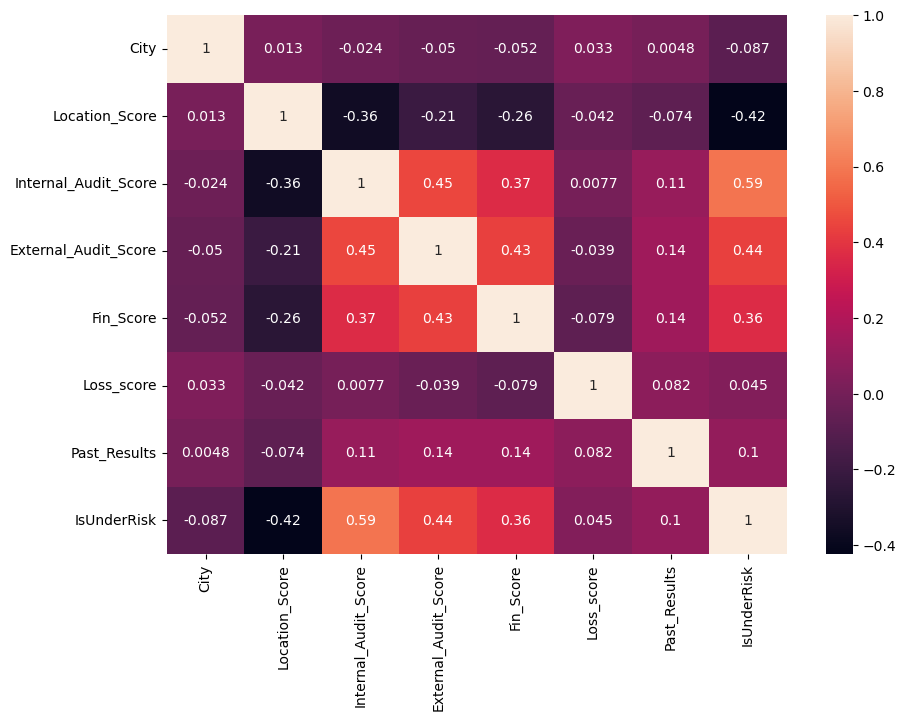

In [10]:
plt.figure(figsize=(10,7))
sns.heatmap(train_data.corr(),annot=True)

In [11]:
# Calculate the correlation matrix
correlation_matrix = train_data.corr()
# Find pairs of variables with correlation close to 0
threshold = 0.1  # You can adjust this threshold based on your needs
non_correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) < threshold:
            non_correlated_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

print("Pairs of variables with low correlation:")
for pair in non_correlated_pairs:
    print(pair)

Pairs of variables with low correlation:
('City', 'Location_Score')
('City', 'Internal_Audit_Score')
('City', 'External_Audit_Score')
('City', 'Fin_Score')
('City', 'Loss_score')
('City', 'Past_Results')
('City', 'IsUnderRisk')
('Location_Score', 'Loss_score')
('Location_Score', 'Past_Results')
('Internal_Audit_Score', 'Loss_score')
('External_Audit_Score', 'Loss_score')
('Fin_Score', 'Loss_score')
('Loss_score', 'Past_Results')
('Loss_score', 'IsUnderRisk')


In [12]:
# Find pairs of variables with correlation close to 1 or -1
threshold = 0.8  # You can adjust this threshold based on your needs
highly_correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) >= threshold:
            highly_correlated_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

print("Pairs of variables with high correlation:")
for pair in highly_correlated_pairs:
    print(pair)

Pairs of variables with high correlation:


(array([1, 2, 3, 4]),
 [Text(1, 0, 'Internal_Audit_Score'),
  Text(2, 0, 'External_Audit_Score'),
  Text(3, 0, 'Loss_score'),
  Text(4, 0, 'Past_Results')])

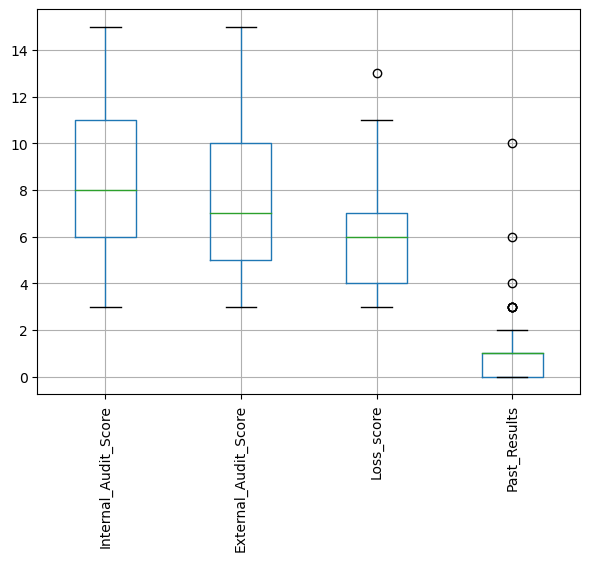

In [13]:
plt.figure(figsize=(7,5))
train_data.boxplot(column=['Internal_Audit_Score','External_Audit_Score','Loss_score','Past_Results'])
plt.xticks(rotation='vertical')

In [14]:
train_data.columns

Index(['City', 'Location_Score', 'Internal_Audit_Score',
       'External_Audit_Score', 'Fin_Score', 'Loss_score', 'Past_Results',
       'IsUnderRisk'],
      dtype='object')

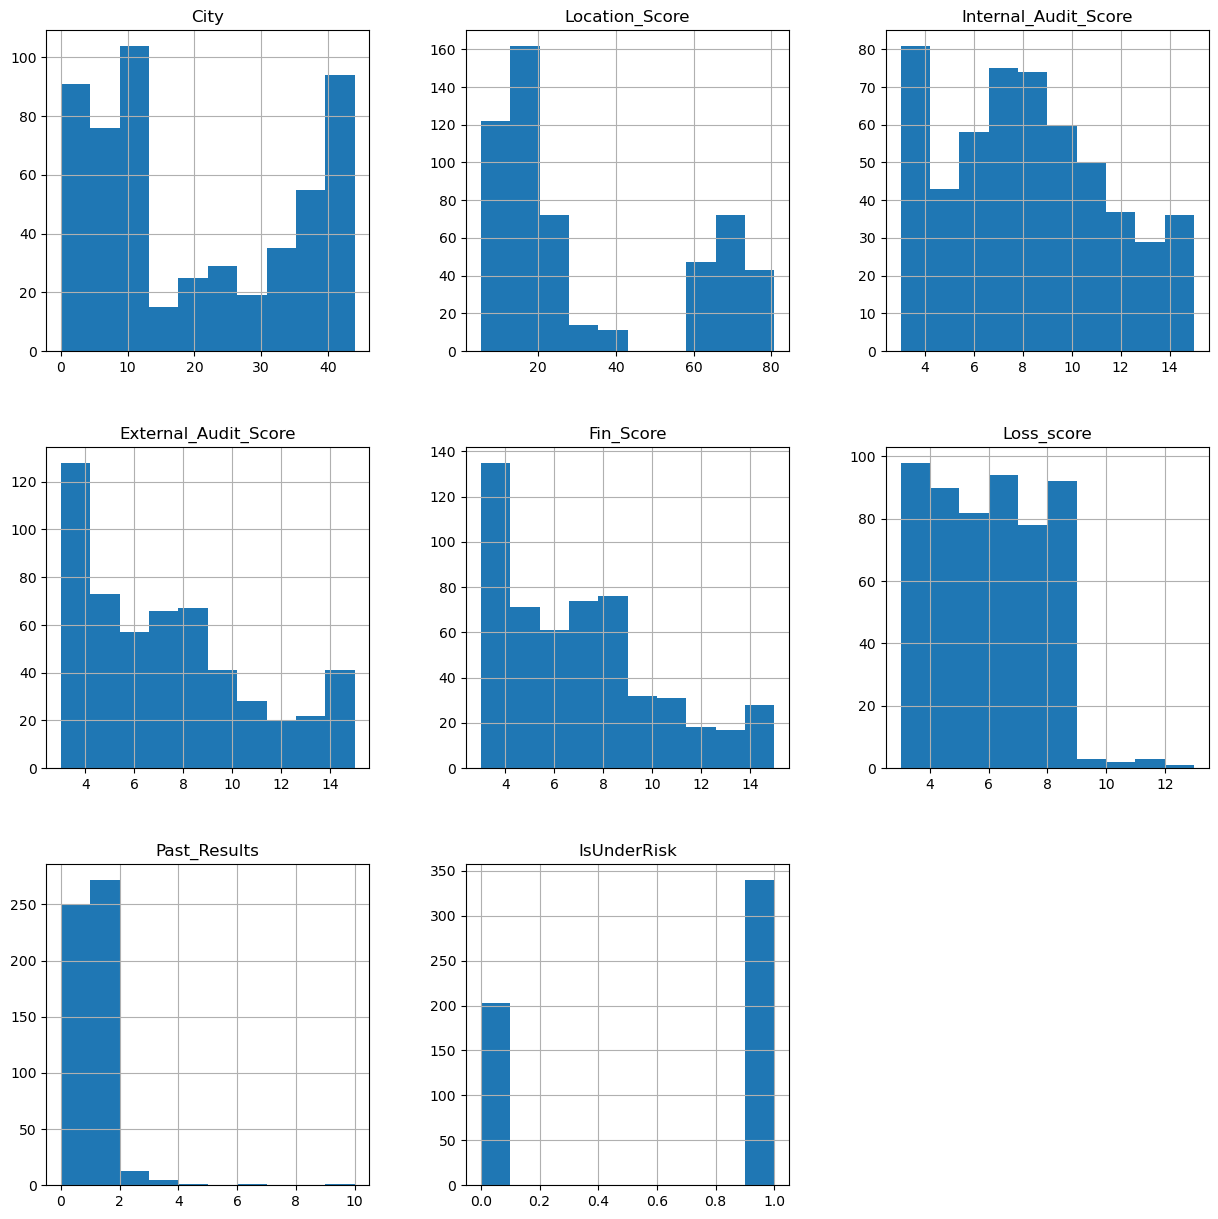

In [15]:
train_data.hist(figsize=(15,15))
plt.show()


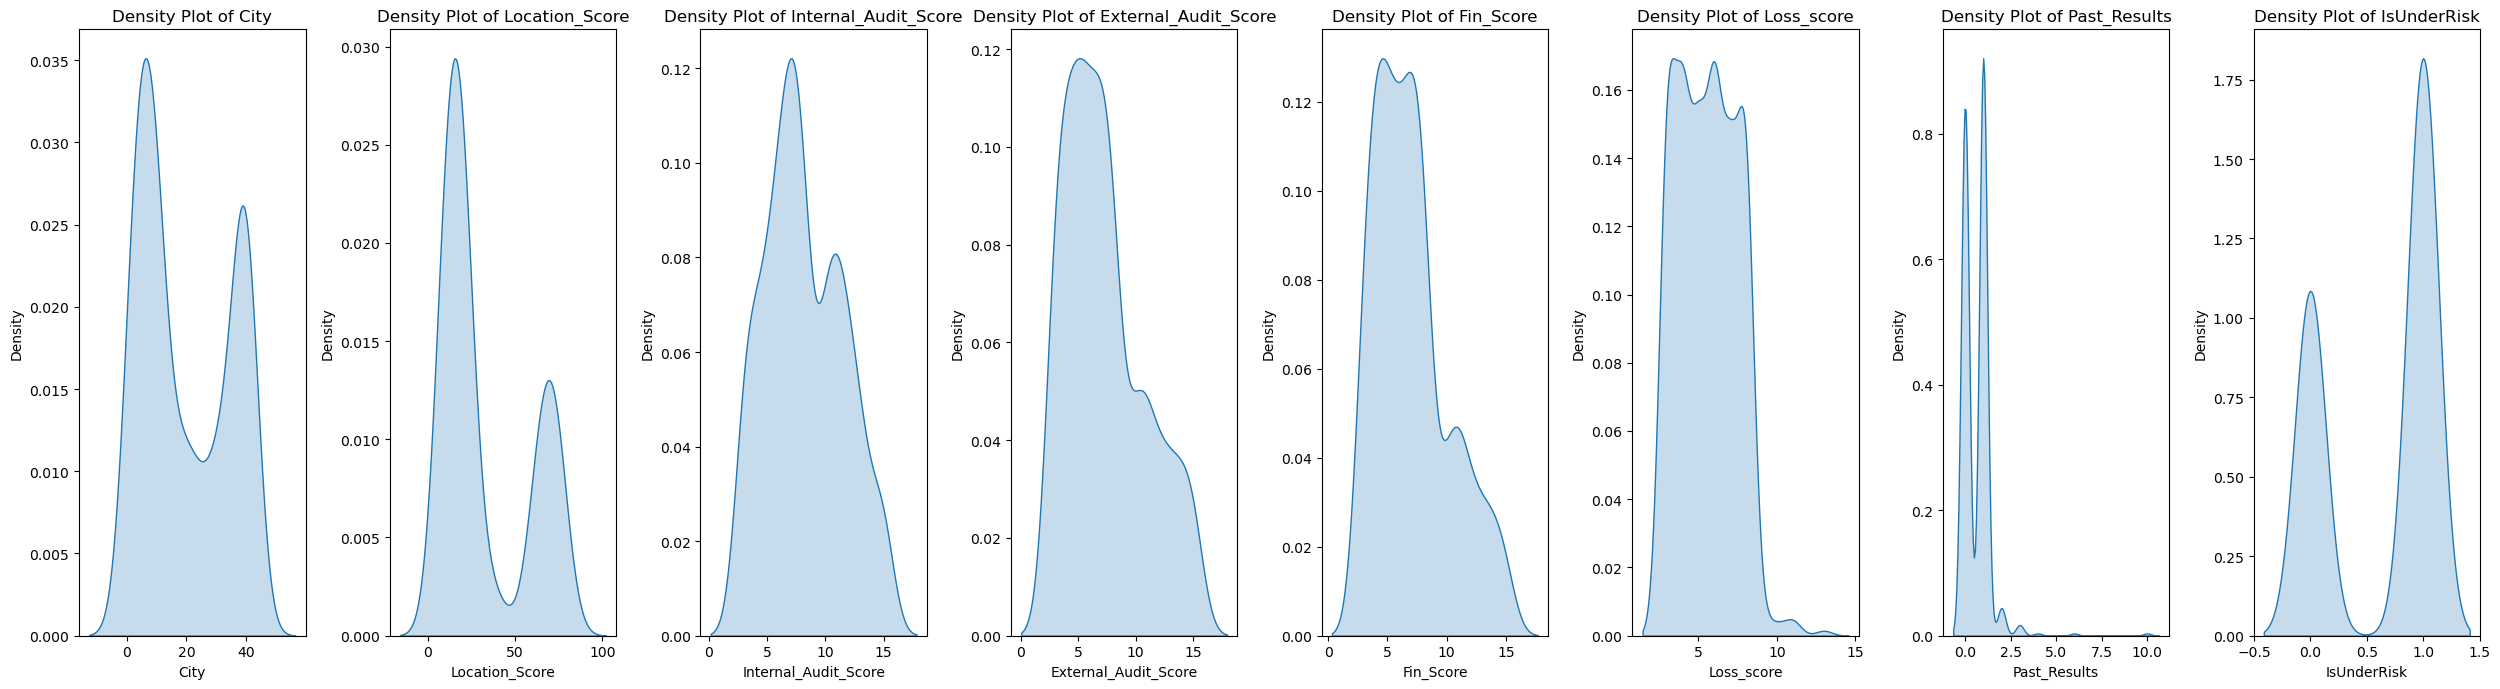

In [16]:
plt.figure(figsize=(25,7))
# Loop through each column and create a density plot
for column in train_data.columns:
    plt.subplot(1, len(train_data.columns), train_data.columns.get_loc(column) + 1)
    sns.kdeplot(train_data[column], shade=True)
    plt.title(f'Density Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')

# Adjust layout to prevent overlapping labels
plt.tight_layout()

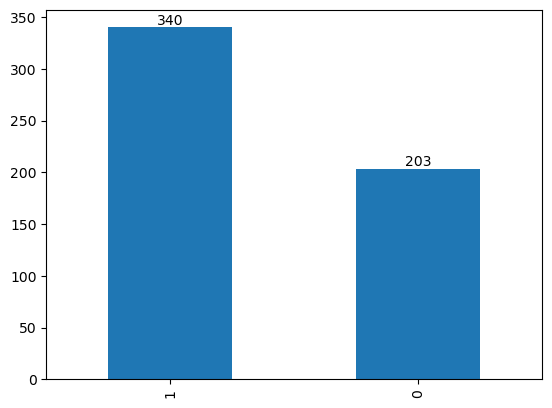

In [17]:
ax = train_data.IsUnderRisk.value_counts().plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)

In [18]:
train_data.head(10)

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
0,2,8.032,14,8,3,6,0,1
1,31,77.730,8,3,3,8,1,0
2,40,59.203,3,12,11,3,0,1
3,12,73.080,4,5,7,6,0,0
4,4,15.666,13,15,6,7,2,1
5,1,6.237,10,10,12,3,1,1
6,9,13.795,8,3,5,3,0,0
7,23,74.132,11,15,5,8,0,1
8,40,69.522,8,4,7,6,0,0
9,38,6.577,8,5,7,3,1,0


In [19]:
# divide independent varibale and dependent varibale

In [20]:
X= train_data.drop(['IsUnderRisk'], axis=1)
y = train_data['IsUnderRisk']

In [21]:
X

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results
0,2,8.032,14,8,3,6,0
1,31,77.730,8,3,3,8,1
2,40,59.203,3,12,11,3,0
3,12,73.080,4,5,7,6,0
4,4,15.666,13,15,6,7,2
...,...,...,...,...,...,...,...
538,16,74.017,7,4,5,7,1
539,2,70.460,7,5,6,4,0
540,1,79.243,7,5,3,8,1
541,40,69.140,7,8,4,5,1


In [22]:
y

0      1
1      0
2      1
3      0
4      1
      ..
538    0
539    0
540    0
541    1
542    1
Name: IsUnderRisk, Length: 543, dtype: int64

In [23]:
# Spliting  X train and X test

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y , test_size=0.2 ,random_state= 42)

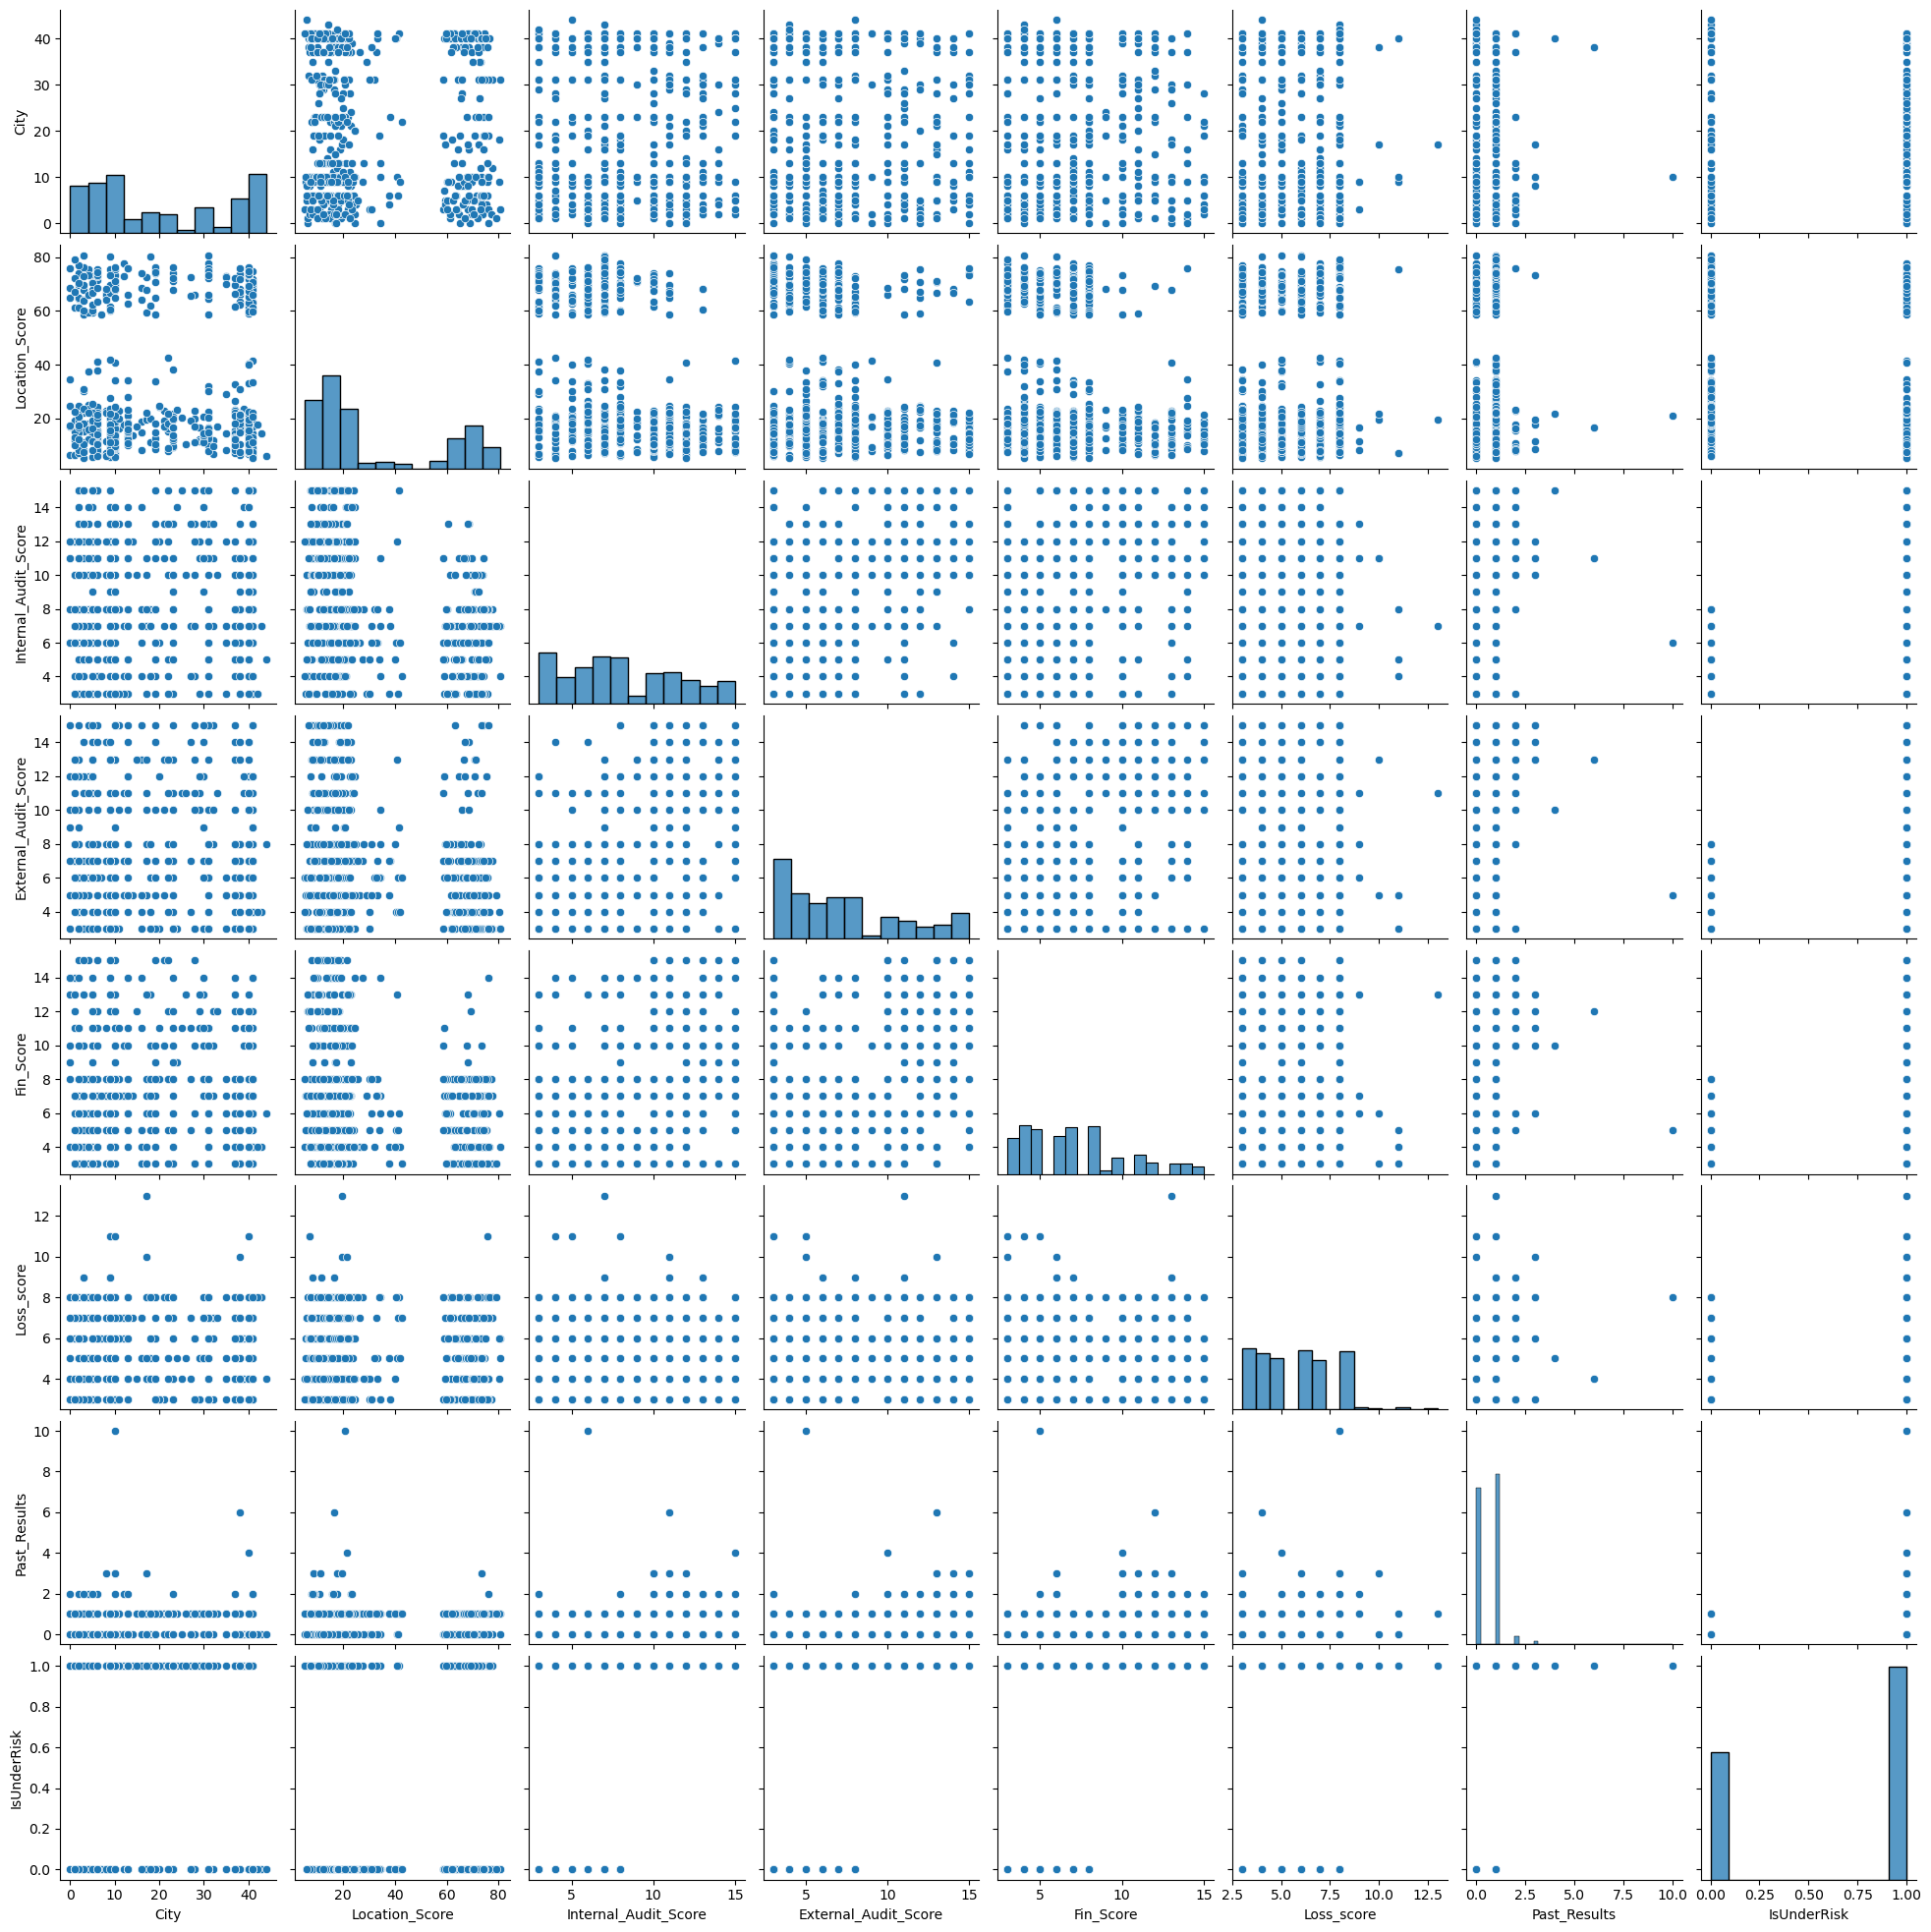

In [25]:
sns.pairplot(train_data)

# Evalution

# 1. Logistics Regression Model 


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn .metrics import confusion_matrix,classification_report,accuracy_score

In [27]:
lr = LogisticRegression()

In [28]:
model = lr.fit(X_train,y_train)

In [29]:
y_predict= model.predict(X_test)

In [30]:
model.score(X_train,y_train)

0.8317972350230415

In [31]:
model.intercept_

array([-5.90048334])

In [32]:
model.coef_

array([[-0.01599603, -0.02579258,  0.52465236,  0.27296369,  0.24080746,
         0.06898552,  0.16732916]])

In [33]:
confusion_matrix(y_test, y_predict)

array([[25,  7],
       [15, 62]], dtype=int64)

In [34]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.62      0.78      0.69        32
           1       0.90      0.81      0.85        77

    accuracy                           0.80       109
   macro avg       0.76      0.79      0.77       109
weighted avg       0.82      0.80      0.80       109



### Calculate accuracy

In [35]:
accuracy = accuracy_score(y_test, y_predict)
print("Accuracy:", accuracy)

Accuracy: 0.7981651376146789


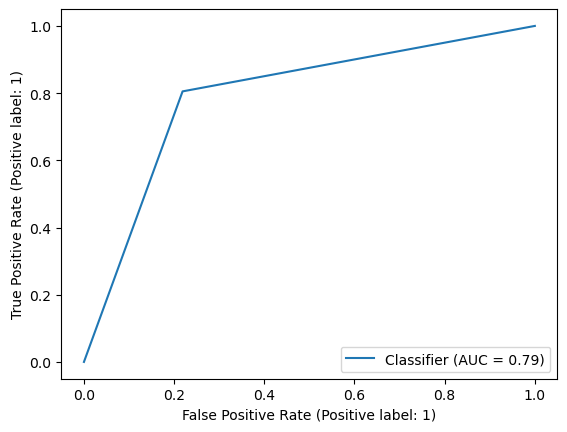

In [36]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test,y_predict)

# 2. Decision Tree model 

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [38]:
# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
dt= DecisionTreeClassifier()

In [40]:
# Define parameter grid
param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [41]:
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')

In [42]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [43]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 5}


In [44]:
# Train a final model using the best parameters on the entire training set
final_model = DecisionTreeClassifier(**best_params)
final_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=4, min_samples_split=5)

In [45]:
# Predict on the validation set
y_pred = final_model.predict(X_val)

In [46]:
# Chech train model score

In [47]:
grid_search.score(X_train,y_train)

0.9400921658986175

### Calculate accuracy

In [48]:

accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.7981651376146789


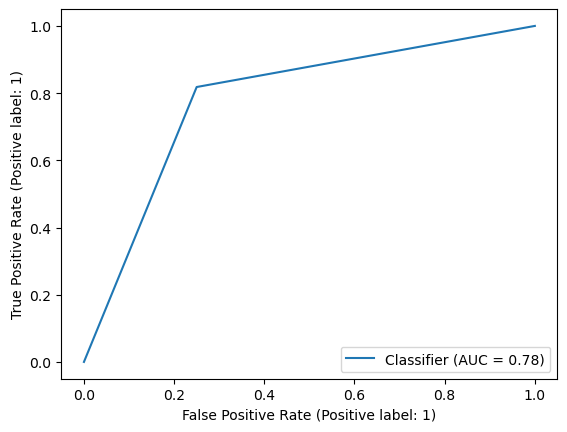

In [49]:
RocCurveDisplay.from_predictions(y_test,y_pred)

# 3. Random Forest Classifier Model

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
# Best parameters found through grid search or other method
best_params = {
    'n_estimators': 100,
    'max_depth': 10,
    'min_samples_split': 2,
    'min_samples_leaf': 1
}

In [52]:
# Create a Random Forest classifier with the best parameters

In [53]:
rf_classifier = RandomForestClassifier(**best_params,random_state=42)

In [54]:
# Train the classifier on the training data
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [55]:
# Make predictions on the testing data

In [56]:
y_pred = rf_classifier.predict(X_test)

### Calculate accuracy

In [57]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8532110091743119


In [59]:
# Save the trained classifier to a pickle file
import pickle
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf_classifier, file)